In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import talib
sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')

data = pd.read_csv('data/CME_DL_6AH2020, 1D.csv')

In [2]:
data['datetime'] = pd.to_datetime(data['time'])
data = data.set_index('datetime')
data = pd.DataFrame(data.loc[:, 'open':'close'])
data.head()
data.tail()

,open,high,low,close
datetime,,,,
2020-02-20 23:00:00+00:00,0.6614,0.6642,0.6588,0.6634
2020-02-23 23:00:00+00:00,0.6599,0.6622,0.6590,0.6600
2020-02-24 23:00:00+00:00,0.6603,0.6625,0.6588,0.6602
2020-02-25 23:00:00+00:00,0.6601,0.6609,0.6545,0.6560
2020-02-26 23:00:00+00:00,0.6551,0.6563,0.6546,0.6559


In [3]:
start_date = '2019-01-01'
end_date = '2019-12-31'
mask = (data.index >= start_date) & (data.index <= end_date)
data = data.loc[mask]

In [4]:
data.describe()

,open,high,low,close
count,252.000000,252.000000,252.000000,252.000000
mean,0.698997,0.699681,0.698321,0.699015
std,0.015116,0.014576,0.015633,0.015053
min,0.673900,0.675000,0.670800,0.673700
25%,0.685700,0.687025,0.684000,0.685100
50%,0.697750,0.698300,0.697200,0.697750
75%,0.712975,0.712975,0.712975,0.712975
max,0.731600,0.731600,0.731600,0.731600


/Users/xiaomanli/python-apps/trading/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


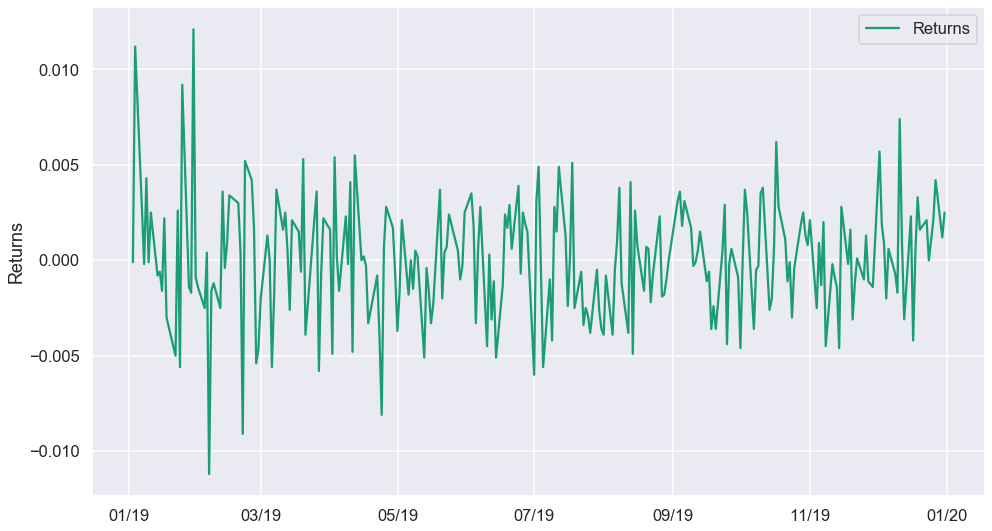

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(16,9))
ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'close'].diff(), label='Returns')
ax.set_ylabel('Returns')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

# volatility is cyclic

In [6]:
# ATR as a measure of volatility, to spot sudden volatility changes
length = 4
num_range = 1.5
data['ATR'] = talib.ATR(data['high'], data['low'], data['close'], timeperiod=length)*num_range

In [7]:
data.head(20)

,open,high,low,close,ATR
datetime,,,,,
2019-01-01 23:00:00+00:00,0.7048,0.7048,0.7048,0.7048,NaN
2019-01-02 23:00:00+00:00,0.7047,0.7047,0.7047,0.7047,NaN
2019-01-03 23:00:00+00:00,0.7159,0.7159,0.7159,0.7159,NaN
2019-01-06 23:00:00+00:00,0.7187,0.7187,0.7187,0.7187,NaN
2019-01-07 23:00:00+00:00,0.7185,0.7185,0.7185,0.7185,0.005362
2019-01-08 23:00:00+00:00,0.7228,0.7228,0.7228,0.7228,0.005634
2019-01-09 23:00:00+00:00,0.7227,0.7227,0.7227,0.7227,0.004263
2019-01-10 23:00:00+00:00,0.7252,0.7252,0.7252,0.7252,0.004135
2019-01-13 23:00:00+00:00,0.7244,0.7244,0.7244,0.7244,0.003401


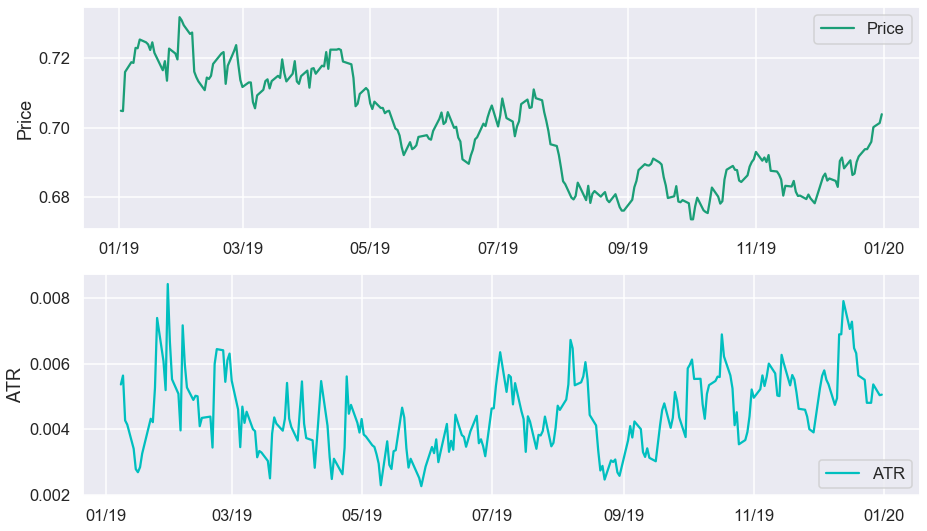

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,9))

ax1.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'close'], label='Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'ATR'], label = 'ATR', color='c')
ax2.set_ylabel('ATR')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [9]:
# Set a buy stop order at Open + Average( Range, Length ) * NumRanges  next bar
# Set a sell stop order at Open - Average( Range, Length ) * NumRanges  next bar
data['long_stop']= data['open'] + data['ATR']
data['short_stop'] = data['open'] - data['ATR']
data.head(20)

,open,high,low,close,ATR,long_stop,short_stop
datetime,,,,,,,
2019-01-01 23:00:00+00:00,0.7048,0.7048,0.7048,0.7048,NaN,NaN,NaN
2019-01-02 23:00:00+00:00,0.7047,0.7047,0.7047,0.7047,NaN,NaN,NaN
2019-01-03 23:00:00+00:00,0.7159,0.7159,0.7159,0.7159,NaN,NaN,NaN
2019-01-06 23:00:00+00:00,0.7187,0.7187,0.7187,0.7187,NaN,NaN,NaN
2019-01-07 23:00:00+00:00,0.7185,0.7185,0.7185,0.7185,0.005362,0.723863,0.713137
2019-01-08 23:00:00+00:00,0.7228,0.7228,0.7228,0.7228,0.005634,0.728434,0.717166
2019-01-09 23:00:00+00:00,0.7227,0.7227,0.7227,0.7227,0.004263,0.726963,0.718437
2019-01-10 23:00:00+00:00,0.7252,0.7252,0.7252,0.7252,0.004135,0.729335,0.721065
2019-01-13 23:00:00+00:00,0.7244,0.7244,0.7244,0.7244,0.003401,0.727801,0.720999


In [10]:
data['long_stop'] = data['long_stop'].shift(1)
data['short_stop'] = data['short_stop'].shift(1)


In [11]:
data.head(20)

,open,high,low,close,ATR,long_stop,short_stop
datetime,,,,,,,
2019-01-01 23:00:00+00:00,0.7048,0.7048,0.7048,0.7048,NaN,NaN,NaN
2019-01-02 23:00:00+00:00,0.7047,0.7047,0.7047,0.7047,NaN,NaN,NaN
2019-01-03 23:00:00+00:00,0.7159,0.7159,0.7159,0.7159,NaN,NaN,NaN
2019-01-06 23:00:00+00:00,0.7187,0.7187,0.7187,0.7187,NaN,NaN,NaN
2019-01-07 23:00:00+00:00,0.7185,0.7185,0.7185,0.7185,0.005362,NaN,NaN
2019-01-08 23:00:00+00:00,0.7228,0.7228,0.7228,0.7228,0.005634,0.723863,0.713137
2019-01-09 23:00:00+00:00,0.7227,0.7227,0.7227,0.7227,0.004263,0.728434,0.717166
2019-01-10 23:00:00+00:00,0.7252,0.7252,0.7252,0.7252,0.004135,0.726963,0.718437
2019-01-13 23:00:00+00:00,0.7244,0.7244,0.7244,0.7244,0.003401,0.729335,0.721065


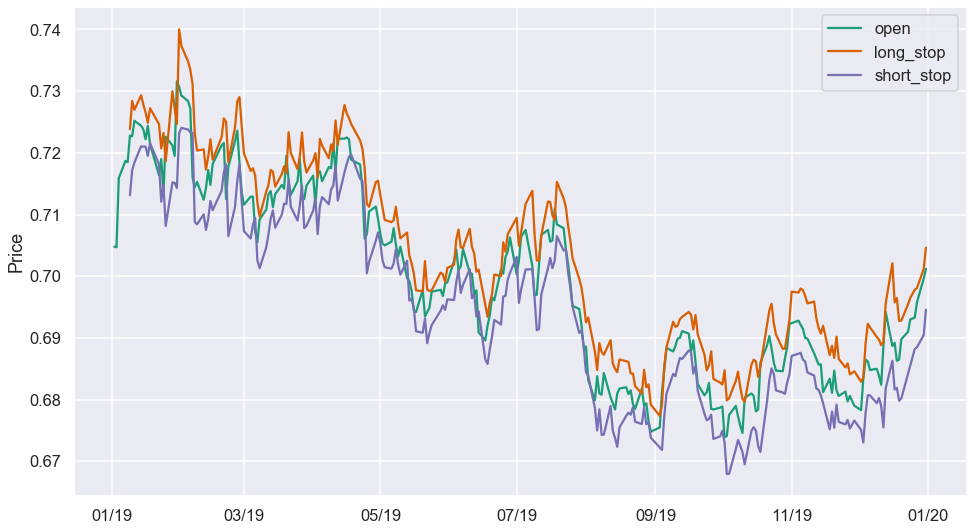

In [12]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'open'], label='open')
ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'long_stop'], label='long_stop')
ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'short_stop'], label='short_stop')
ax.set_ylabel('Price')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [13]:
data['trading_positions_long'] = data['high']- data['long_stop']
data['trading_positions_short'] = data['low']- data['short_stop']

data['trading_positions_long'] = data['trading_positions_long'].apply(np.sign)
data['trading_positions_short'] = data['trading_positions_short'].apply(np.sign)
data.head(20)

,open,high,low,close,ATR,long_stop,short_stop,trading_positions_long,trading_positions_short
datetime,,,,,,,,,
2019-01-01 23:00:00+00:00,0.7048,0.7048,0.7048,0.7048,NaN,NaN,NaN,NaN,NaN
2019-01-02 23:00:00+00:00,0.7047,0.7047,0.7047,0.7047,NaN,NaN,NaN,NaN,NaN
2019-01-03 23:00:00+00:00,0.7159,0.7159,0.7159,0.7159,NaN,NaN,NaN,NaN,NaN
2019-01-06 23:00:00+00:00,0.7187,0.7187,0.7187,0.7187,NaN,NaN,NaN,NaN,NaN
2019-01-07 23:00:00+00:00,0.7185,0.7185,0.7185,0.7185,0.005362,NaN,NaN,NaN,NaN
2019-01-08 23:00:00+00:00,0.7228,0.7228,0.7228,0.7228,0.005634,0.723863,0.713137,-1.0,1.0
2019-01-09 23:00:00+00:00,0.7227,0.7227,0.7227,0.7227,0.004263,0.728434,0.717166,-1.0,1.0
2019-01-10 23:00:00+00:00,0.7252,0.7252,0.7252,0.7252,0.004135,0.726963,0.718437,-1.0,1.0
2019-01-13 23:00:00+00:00,0.7244,0.7244,0.7244,0.7244,0.003401,0.729335,0.721065,-1.0,1.0


In [14]:
data['trading_positions'] = (data['trading_positions_long'] + data['trading_positions_short'])/2
data.head(20)

,open,high,low,close,ATR,long_stop,short_stop,trading_positions_long,trading_positions_short,trading_positions
datetime,,,,,,,,,,
2019-01-01 23:00:00+00:00,0.7048,0.7048,0.7048,0.7048,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 23:00:00+00:00,0.7047,0.7047,0.7047,0.7047,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03 23:00:00+00:00,0.7159,0.7159,0.7159,0.7159,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-06 23:00:00+00:00,0.7187,0.7187,0.7187,0.7187,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07 23:00:00+00:00,0.7185,0.7185,0.7185,0.7185,0.005362,NaN,NaN,NaN,NaN,NaN
2019-01-08 23:00:00+00:00,0.7228,0.7228,0.7228,0.7228,0.005634,0.723863,0.713137,-1.0,1.0,0.0
2019-01-09 23:00:00+00:00,0.7227,0.7227,0.7227,0.7227,0.004263,0.728434,0.717166,-1.0,1.0,0.0
2019-01-10 23:00:00+00:00,0.7252,0.7252,0.7252,0.7252,0.004135,0.726963,0.718437,-1.0,1.0,0.0
2019-01-13 23:00:00+00:00,0.7244,0.7244,0.7244,0.7244,0.003401,0.729335,0.721065,-1.0,1.0,0.0


In [15]:
# if no long short signal, continue holding of current position.
for i in range(1, len(data)):
    if data.iloc[i, 9] == 0:
        data.iloc[i, 9] = data.iloc[i-1, 9]
data

,open,high,low,close,ATR,long_stop,short_stop,trading_positions_long,trading_positions_short,trading_positions
datetime,,,,,,,,,,
2019-01-01 23:00:00+00:00,0.7048,0.7048,0.7048,0.7048,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 23:00:00+00:00,0.7047,0.7047,0.7047,0.7047,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03 23:00:00+00:00,0.7159,0.7159,0.7159,0.7159,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-06 23:00:00+00:00,0.7187,0.7187,0.7187,0.7187,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07 23:00:00+00:00,0.7185,0.7185,0.7185,0.7185,0.005362,NaN,NaN,NaN,NaN,NaN
2019-01-08 23:00:00+00:00,0.7228,0.7228,0.7228,0.7228,0.005634,0.723863,0.713137,-1.0,1.0,NaN
2019-01-09 23:00:00+00:00,0.7227,0.7227,0.7227,0.7227,0.004263,0.728434,0.717166,-1.0,1.0,NaN
2019-01-10 23:00:00+00:00,0.7252,0.7252,0.7252,0.7252,0.004135,0.726963,0.718437,-1.0,1.0,NaN
2019-01-13 23:00:00+00:00,0.7244,0.7244,0.7244,0.7244,0.003401,0.729335,0.721065,-1.0,1.0,NaN


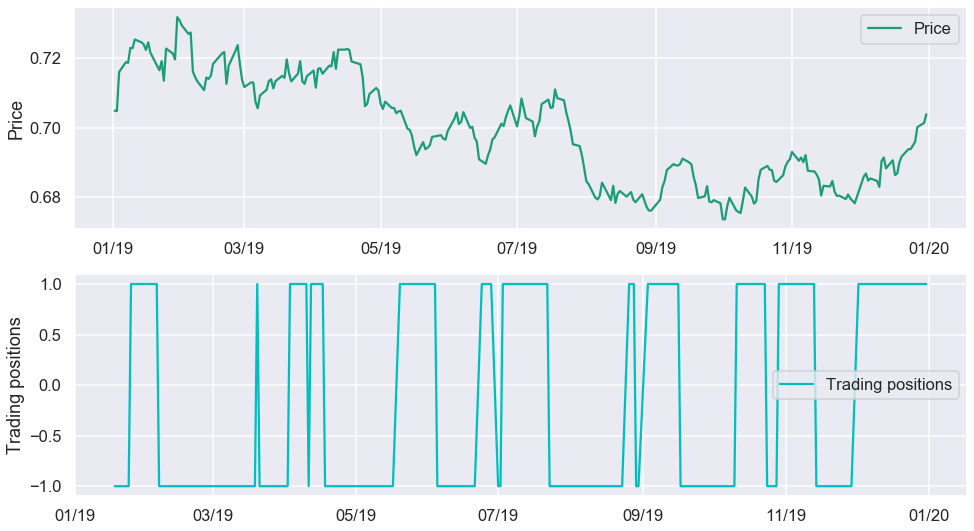

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'close'], label='Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'trading_positions'], label='Trading positions', color='c')
ax2.set_ylabel('Trading positions')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [17]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
asset_log_returns = np.log(data['close']).diff()
asset_log_returns.head()

datetime
2019-01-01 23:00:00+00:00         NaN
2019-01-02 23:00:00+00:00   -0.000142
2019-01-03 23:00:00+00:00    0.015768
2019-01-06 23:00:00+00:00    0.003904
2019-01-07 23:00:00+00:00   -0.000278
Name: close, dtype: float64

Total portfolio return is: -0.14%
Average yearly return is: -0.15%


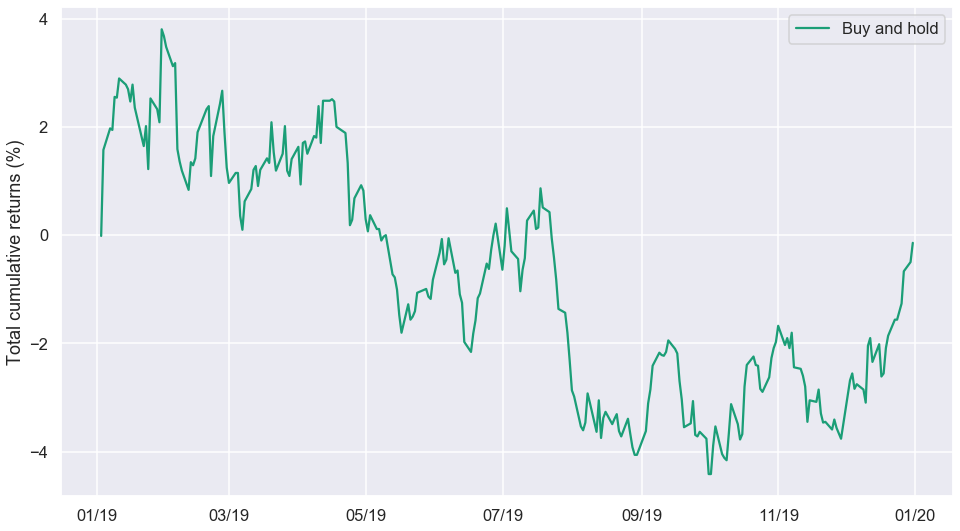

In [18]:
# Get the cumulative log-returns of buy and hold
simple_cum_strategy_asset_log_returns = asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
simple_cum_strategy_asset_relative_returns = np.exp(simple_cum_strategy_asset_log_returns) - 1

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(simple_cum_strategy_asset_relative_returns.index, 100*simple_cum_strategy_asset_relative_returns, label='Buy and hold')
ax.set_ylabel('Total cumulative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns.values[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')

print_portfolio_yearly_statistics(simple_cum_strategy_asset_relative_returns)

Total portfolio return is:  9.59%
Average yearly return is:  9.95%


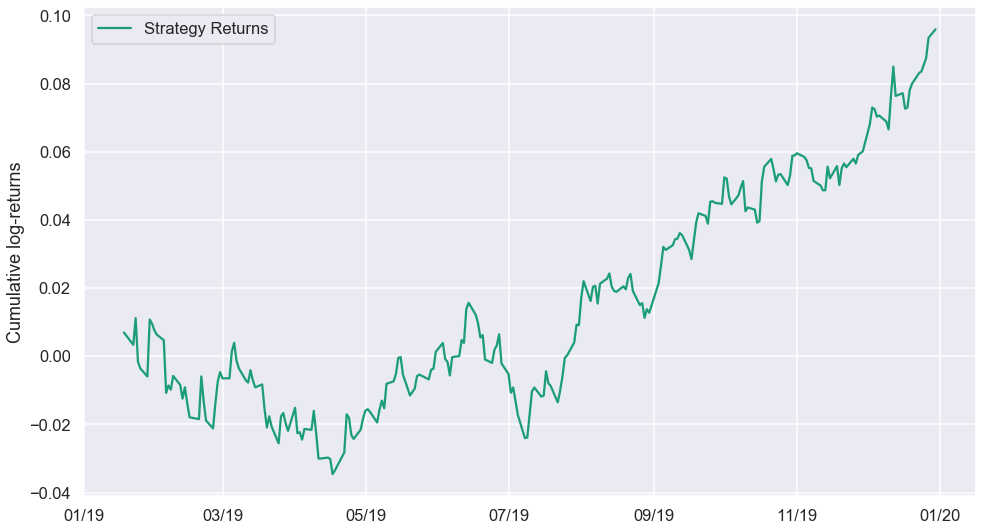

In [19]:
strategy_asset_log_returns = np.log(data['open']).diff()
strategy_asset_log_returns = data['trading_positions'] * strategy_asset_log_returns.shift(-1)
# Get the cumulative log-returns
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_strategy_asset_relative_returns.index, cum_strategy_asset_relative_returns.values, label='Strategy Returns')
ax.set_ylabel('Cumulative log-returns')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

print_portfolio_yearly_statistics(cum_strategy_asset_relative_returns[:-1])

In [20]:
strategy_asset_log_returns = np.log(data['close']).diff()
strategy_asset_log_returns = data['trading_positions'] * asset_log_returns

# Get the cumulative log-returns
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

Total portfolio return is: 39.25%
Average yearly return is: 40.73%


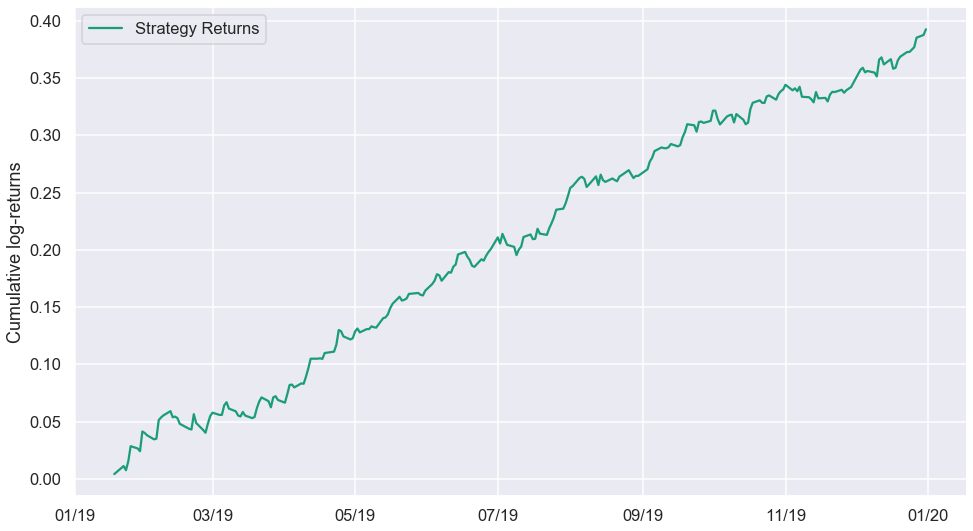

In [21]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_strategy_asset_relative_returns.index, cum_strategy_asset_relative_returns.values, label='Strategy Returns')
ax.set_ylabel('Cumulative log-returns')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

print_portfolio_yearly_statistics(cum_strategy_asset_relative_returns)

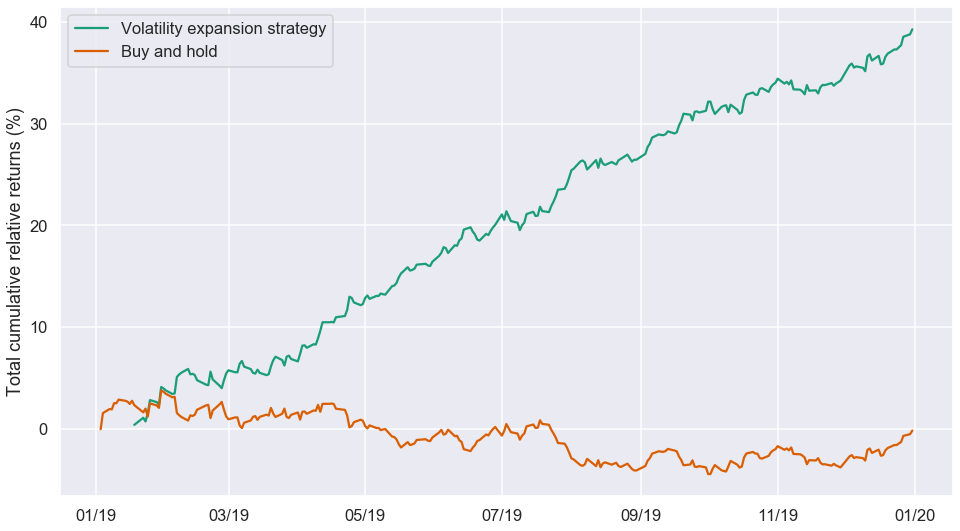

In [22]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns, label='Volatility expansion strategy')
ax.plot(simple_cum_strategy_asset_relative_returns.index, 100*simple_cum_strategy_asset_relative_returns, label='Buy and hold')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [23]:
data.shape

(252, 10)

In [24]:
data.head()

,open,high,low,close,ATR,long_stop,short_stop,trading_positions_long,trading_positions_short,trading_positions
datetime,,,,,,,,,,
2019-01-01 23:00:00+00:00,0.7048,0.7048,0.7048,0.7048,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 23:00:00+00:00,0.7047,0.7047,0.7047,0.7047,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03 23:00:00+00:00,0.7159,0.7159,0.7159,0.7159,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-06 23:00:00+00:00,0.7187,0.7187,0.7187,0.7187,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07 23:00:00+00:00,0.7185,0.7185,0.7185,0.7185,0.005362,NaN,NaN,NaN,NaN,NaN


In [25]:
data

,open,high,low,close,ATR,long_stop,short_stop,trading_positions_long,trading_positions_short,trading_positions
datetime,,,,,,,,,,
2019-01-01 23:00:00+00:00,0.7048,0.7048,0.7048,0.7048,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02 23:00:00+00:00,0.7047,0.7047,0.7047,0.7047,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03 23:00:00+00:00,0.7159,0.7159,0.7159,0.7159,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-06 23:00:00+00:00,0.7187,0.7187,0.7187,0.7187,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07 23:00:00+00:00,0.7185,0.7185,0.7185,0.7185,0.005362,NaN,NaN,NaN,NaN,NaN
2019-01-08 23:00:00+00:00,0.7228,0.7228,0.7228,0.7228,0.005634,0.723863,0.713137,-1.0,1.0,NaN
2019-01-09 23:00:00+00:00,0.7227,0.7227,0.7227,0.7227,0.004263,0.728434,0.717166,-1.0,1.0,NaN
2019-01-10 23:00:00+00:00,0.7252,0.7252,0.7252,0.7252,0.004135,0.726963,0.718437,-1.0,1.0,NaN
2019-01-13 23:00:00+00:00,0.7244,0.7244,0.7244,0.7244,0.003401,0.729335,0.721065,-1.0,1.0,NaN
